In [81]:
# imports
from pathlib import Path
from openai import OpenAI
from dotenv import load_dotenv
import os
import time
import pandas as pd
from collections import defaultdict
import re
import numpy as np
from scipy.spatial.distance import cosine
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# load API key
dotenv_path = Path(r"C:\Storage\python_projects\ashvin\.env")
load_dotenv(dotenv_path=dotenv_path)

OPENAI_API_KEY = os.getenv("OPENAI_API_KEY")

In [3]:
# main constants
GPT_EMBEDDING_SMALL = 'text-embedding-3-small'
GPT_EMBEDDING_LARGE = 'text-embedding-3-large'

In [51]:
# list of strings as input
texts = [
    "Catapult-Encyclopedia-Volcano: A catapult represents ancient military technology, an encyclopedia symbolizes a collection of human knowledge, and a volcano signifies a natural force. Together, they depict the interaction between human invention, knowledge, and natural phenomena.",
    "Giraffe-Quasar-Cupcake: A giraffe represents the animal kingdom and its unique adaptations, a quasar symbolizes the mysteries of the cosmos and extreme energy, and a cupcake signifies human culinary creativity. This trisociation illustrates the diversity of life, the universe, and human culture.",
    "Piano-Asteroid-Tulip: A piano symbolizes musical artistry and human creativity, an asteroid represents celestial objects and the vastness of space, and a tulip signifies natural beauty and the diversity of flora. Together, they depict the harmony between art, science, and nature.",
    "Kangaroo-Neutron-Fountain: A kangaroo represents unique wildlife and adaptation, a neutron signifies subatomic particles and the intricacies of physics, and a fountain symbolizes human engineering and aesthetics. This trisociation illustrates the interplay between biology, physics, and human design.",
    "Pyramid-Butterfly-Algorithm: A pyramid symbolizes ancient architecture and human ingenuity, a butterfly represents the beauty and complexity of nature, and an algorithm signifies modern technology and problem-solving. Together, they depict the evolution of human understanding and innovation across different eras."
]


In [52]:
#instantiate client
client = OpenAI()

In [53]:
# get single embedding
def get_embedding(text):
    response = client.embeddings.create(
        model=GPT_EMBEDDING_SMALL,
        input=text,
        encoding_format="float"
    )
    embedding = response.data[0].embedding
    return embedding

In [54]:
# test single embedding
text = texts[0]
embedding = get_embedding(text)
print("Embedding:", embedding)

Embedding: [0.060496397, -0.03969448, 0.0067581106, 0.024507573, -0.0014908983, 0.029594999, -0.020776793, -0.010614505, -0.020073347, 0.02439452, -0.00044711246, 0.0020710847, 0.017259562, -0.02871569, 0.03627774, 0.0041044843, -0.054617595, 0.0017931605, -0.013453414, -0.009188769, -0.02936889, -0.0048738793, 0.033966415, 0.0061457353, -0.011424724, 0.008089635, -0.031428985, 0.09692488, 0.053411685, 0.010350713, 0.048613176, -0.0182268, -0.059943687, -3.85924e-05, -0.013692083, 0.025751166, 0.06190329, -0.034293015, -0.04205605, 0.021379748, 0.036905818, -0.021857087, 0.0011171923, 0.02057581, -0.032986615, -0.05858704, -0.029670367, 0.0014500732, -0.017196754, 0.03205706, 0.019646255, -0.021668663, 0.044920083, 0.07175154, 0.0032440189, -0.029243276, -0.012492456, -0.012988636, -0.041503344, 0.019596009, -0.049266376, -0.0062776315, 0.04806047, 0.018025815, -0.030800907, 0.017774586, -0.004000852, 0.029971844, -0.046427466, -0.033388585, 0.047055546, 0.039995957, -0.02553762, 0.018

In [55]:
# get list of embeddings
def get_embeddings(texts):
    response = client.embeddings.create(
        model=GPT_EMBEDDING_SMALL,
        input=texts,
        encoding_format="float"
    )
    embeddings = [item.embedding for item in response.data]
    return embeddings

In [56]:
# test multiple embeddings
embeddings = get_embeddings(texts)

for embedding in embeddings:
    print("Embedding:", embedding)

Embedding: [0.060496397, -0.03969448, 0.0067581106, 0.024507573, -0.0014908983, 0.029594999, -0.020776793, -0.010614505, -0.020073347, 0.02439452, -0.00044711246, 0.0020710847, 0.017259562, -0.02871569, 0.03627774, 0.0041044843, -0.054617595, 0.0017931605, -0.013453414, -0.009188769, -0.02936889, -0.0048738793, 0.033966415, 0.0061457353, -0.011424724, 0.008089635, -0.031428985, 0.09692488, 0.053411685, 0.010350713, 0.048613176, -0.0182268, -0.059943687, -3.85924e-05, -0.013692083, 0.025751166, 0.06190329, -0.034293015, -0.04205605, 0.021379748, 0.036905818, -0.021857087, 0.0011171923, 0.02057581, -0.032986615, -0.05858704, -0.029670367, 0.0014500732, -0.017196754, 0.03205706, 0.019646255, -0.021668663, 0.044920083, 0.07175154, 0.0032440189, -0.029243276, -0.012492456, -0.012988636, -0.041503344, 0.019596009, -0.049266376, -0.0062776315, 0.04806047, 0.018025815, -0.030800907, 0.017774586, -0.004000852, 0.029971844, -0.046427466, -0.033388585, 0.047055546, 0.039995957, -0.02553762, 0.018

In [33]:
# calculate group average of embeddings
def calculate_group_average_embedding(embeddings):
    # Convert the list of embeddings to a NumPy array
    embeddings_array = np.array(embeddings)
    # Calculate the average embedding across all embeddings
    group_average_embedding = np.mean(embeddings_array, axis=0)
    return group_average_embedding

In [57]:
# test group average of embeddings
average_embedding = calculate_group_average_embedding(embeddings)
print("Group Average Embedding:", average_embedding)

Group Average Embedding: [ 0.03302156 -0.0441106   0.02323381 ...  0.00494447  0.00845632
  0.01082824]


In [58]:
# calculate cosine similarity between any two embeddings
def calculate_cosine_similarity(embedding1, embedding2):
    # Calculate the cosine similarity (1 - cosine distance)
    cos_sim = 1 - cosine(embedding1, embedding2)
    return cos_sim

In [78]:
# test cosine similarity between two embeddings
embedding1 = embeddings[0]
embedding2 = embeddings[1]
embedding3 = embeddings[2]
embedding4 = embeddings[3]
embedding5 = embeddings[4]
similarity = calculate_cosine_similarity(embedding3, embedding1)
print("Cosine Similarity:", similarity)

Cosine Similarity: 0.26372546379243156


In [63]:
# calculate cosine similarity for each embedding against group average
def calculate_cosine_similarity_bulk(embeddings, reference_embedding):
    # Calculate the cosine similarity for each embedding against the reference embedding
    similarities = [calculate_cosine_similarity(embedding, reference_embedding) for embedding in embeddings]
    return similarities

In [64]:
# test cosine_similarity_bulk
bulk_similarities = calculate_cosine_similarity_bulk(embeddings, average_embedding)
print("Bulk Cosine Similarities:", bulk_similarities)

Bulk Cosine Similarities: [0.6603938756973992, 0.7922984229955213, 0.7117210192820833, 0.7728509899859882, 0.770219872466684]


In [65]:
# calculate pairwise cosine similarities
def calculate_pairwise_cosine_similarities(embeddings):
    # Initialize an empty list to store the pairwise cosine similarities
    pairwise_similarities = []
    # Iterate over each pair of embeddings
    for i in range(len(embeddings)):
        for j in range(i + 1, len(embeddings)):
            # Calculate the cosine similarity between the pair of embeddings
            cos_sim = 1 - cosine(embeddings[i], embeddings[j])
            # Append the cosine similarity to the list
            pairwise_similarities.append(cos_sim)
    return pairwise_similarities

In [66]:
# test pairwise cosine similarities
pairwise_similarities = calculate_pairwise_cosine_similarities(embeddings)
print("Pairwise Cosine Similarities:", pairwise_similarities)

Pairwise Cosine Similarities: [0.41033819766302826, 0.26372546379243156, 0.4208473303295571, 0.35348887428088316, 0.4463119311775683, 0.5801912698110655, 0.5005924693288961, 0.3957272752464749, 0.5329297041140586, 0.46856695831677597]


In [82]:
# plot pairwise similarities as heatmap
def plot_pairwise_cosine_similarities(embeddings):
    # Calculate pairwise cosine similarities
    pairwise_similarities = calculate_pairwise_cosine_similarities(embeddings)
    
    # Convert the flat list of similarities into a square matrix
    n = len(embeddings)
    similarity_matrix = [[0]*n for _ in range(n)]
    k = 0
    for i in range(n):
        for j in range(i + 1, n):
            similarity_matrix[i][j] = pairwise_similarities[k]
            similarity_matrix[j][i] = pairwise_similarities[k]  # Since cosine similarity is symmetric
            k += 1
    
    # Plot the heatmap
    sns.heatmap(similarity_matrix, annot=True, cmap='coolwarm', fmt=".2f")
    plt.title("Pairwise Cosine Similarities")
    plt.show()

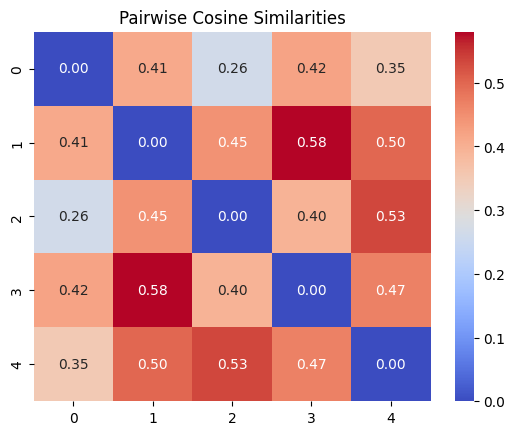

In [83]:
# Example usage of plotting pairwise similarities as heatmap
plot_pairwise_cosine_similarities(embeddings)

In [67]:
# mean and std dev

def calculate_mean_and_std_dev(cosine_similarities):
    # Convert the list of cosine similarities to a NumPy array
    similarities_array = np.array(cosine_similarities)
    # Calculate the mean and standard deviation
    mean = np.mean(similarities_array)
    std_dev = np.std(similarities_array)
    return mean, std_dev

In [68]:
# Example usage
mean, std_dev = calculate_mean_and_std_dev(bulk_similarities)
print("Bulk Similarity Scores")
print("Mean:", mean)
print("Standard Deviation:", std_dev)

print("\n")

mean, std_dev = calculate_mean_and_std_dev(pairwise_similarities)
print("Pairwise Similarity Scores")
print("Mean:", mean)
print("Standard Deviation:", std_dev)

Bulk Similarity Scores
Mean: 0.7414968360855353
Standard Deviation: 0.048689190727247166


Pairwise Similarity Scores
Mean: 0.437271947406074
Standard Deviation: 0.08631689676379443


In [69]:
# function to calculate, t-score, p-value and effect size
def calculate_t_p_effect_size(method1_scores, method2_scores):
    # Calculate the t-score and p-value
    t_score, p_value = stats.ttest_ind(method1_scores, method2_scores, equal_var=False)

    # Calculate the effect size (Cohen's d)
    mean_diff = abs(np.mean(method1_scores) - np.mean(method2_scores))
    pooled_std_dev = np.sqrt((np.std(method1_scores, ddof=1)**2 + np.std(method2_scores, ddof=1)**2) / 2)
    effect_size = mean_diff / pooled_std_dev

    return t_score, p_value, effect_size

In [70]:
# Example usage of calculate_t_p_effect_size
method1_scores = bulk_similarities
method2_scores = pairwise_similarities
t_score, p_value, effect_size = calculate_t_p_effect_size(method1_scores, method2_scores)
print("T-score:", t_score)
print("P-value:", p_value)
print("Effect size (Cohen's d):", effect_size)

T-score: 8.07185650229348
P-value: 2.909389112538055e-06
Effect size (Cohen's d): 4.0578202655362565
